In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

In [7]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [3]:
train_data=pd.read_csv("train.csv", encoding="latin1")
yTrain = train_data.pop("SalePrice") #La variable respuesta
xTrain = train_data.pop("LotArea") 

La separación entre train y test no es necesaria porque los datos ya fueron proporcionados de esa forma.

In [4]:
test_data=pd.read_csv("test.csv", encoding="latin1")
xTest = test_data.pop("LotArea") 

test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
yTest = test_sample.pop("SalePrice")

In [47]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
area = xTrain.values.reshape(-1,1)
area_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(price, area)
price_pred = lm.predict(area_t)

### Ecuación

In [15]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*area % + 0.4f '%(m,c)
print(label)

price_pred = 0.0331*area +4519.3555 


Text(0.5, 1.0, 'Test Set Petal width vs Petal length')

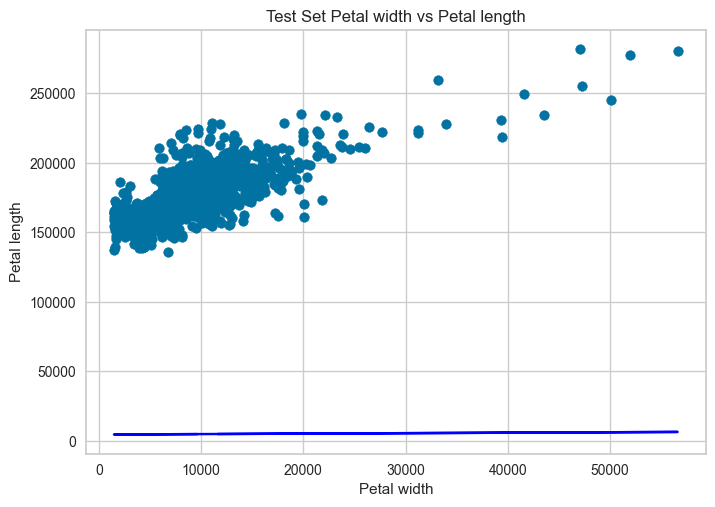

In [ ]:
fig = plt.figure()
plt.scatter(area_t, price_t) # Valor teórico (test)
plt.plot(area_t, price_pred, color="blue") # valor predicho
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Test set lot area vs sale price")

In [19]:
print("Mean Squared Error: %.2f"%mean_squared_error(price_t,price_pred))
print("R^2: %.2f"%r2_score(price_t,price_pred))

Mean Squared Error: 30662920528.85
R^2: -111.46


### Residuales

In [54]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[169277.0524984] [4904.62059158]  -->  		DIFF: [164372.43190682]
[187758.39398877] [4992.30139085]  -->  		DIFF: [182766.09259791]
[183583.68356955] [4977.81499793]  -->  		DIFF: [178605.86857163]
[179317.47751083] [4850.1225825]  -->  		DIFF: [174467.35492833]
[150730.0799765] [4685.26942]  -->  		DIFF: [146044.8105565]
[177150.98924731] [4850.85187459]  -->  		DIFF: [172300.13737272]
[172070.65922916] [4783.88960066]  -->  		DIFF: [167286.7696285]
[175110.95651955] [4797.87874898]  -->  		DIFF: [170313.07777057]
[162011.69883167] [4856.68621133]  -->  		DIFF: [157155.01262034]
[160726.24783142] [4797.8124497]  -->  		DIFF: [155928.43538172]
[157933.279456] [4713.5460634]  -->  		DIFF: [153219.73339261]
[145291.24502039] [4575.04686514]  -->  		DIFF: [140716.19815525]
[159672.01763182] [4575.04686514]  -->  		DIFF: [155096.97076668]
[164167.51830188] [4594.93664948]  -->  		DIFF: [159572.58165241]
[150891.63824405] [4594.93664948]  -->  		DIFF: [146296.70159457]
[179460.96518734] [494

In [21]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 728
Valor real: [281643.97611679]
Valor predicho: [6077.62062274]
Diferencia máxima: [275566.35549405]


Text(0, 0.5, 'Residuales')

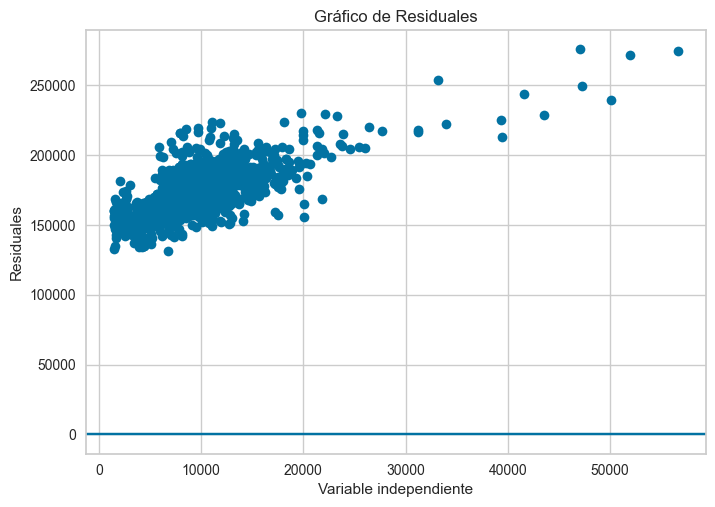

In [24]:
plt.plot(area_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")


## Modelo multivariable

Separación de variables numéricas

In [28]:
train_data=pd.read_csv("train.csv", encoding="latin1")
test_data=pd.read_csv("test.csv", encoding="latin1")

columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

columnas_cuantitativas.remove("Id")
_train = train_data[columnas_cuantitativas]

columnas_cuantitativas.remove("SalePrice")
_test = test_data[columnas_cuantitativas]

38


In [29]:
y_train = _train.pop("SalePrice")

X_train = _train
# Iterar sobre las columnas para reemplazar NaN con la moda de cada columna
for col in X_train.columns:
    mode_value = X_train[col].mode()[0]  # Obtener el valor más frecuente (moda)
    X_train[col] = X_train[col].fillna(mode_value)  # Reemplazar los NaN con la moda

y_test = yTest

X_test = _test
# Iterar sobre las columnas para reemplazar NaN con la moda de cada columna
for col in X_test.columns:
    mode_value = X_test[col].mode()[0]  # Obtener el valor más frecuente (moda)
    X_test[col] = X_test[col].fillna(mode_value)  # Reemplazar los NaN con la moda

C:\Users\Fabi\AppData\Local\Temp\ipykernel_18964\2684763137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(mode_value)  # Reemplazar los NaN con la moda
C:\Users\Fabi\AppData\Local\Temp\ipykernel_18964\2684763137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(mode_value)  # Reemplazar los NaN con la moda
C:\Users\Fabi\AppData\Local\Temp\ipykernel_18964\2684763137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

In [45]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)
theRest = X_train.values
theRest_t = X_test.values

modelo1 = LinearRegression()
modelo1.fit(theRest, price)
y_pred_modelo1 = modelo1.predict(theRest_t)

### Ecuación

In [62]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 440893.9555 + (-180.0826 * MSSubClass) + (-37.9207 * LotFrontage) + (0.4248 * LotArea) + (17308.8994 * OverallQual) + (4885.7965 * OverallCond) + (247.1441 * YearBuilt) + (113.3069 * YearRemodAdd) + (30.8692 * MasVnrArea) + (9.9392 * BsmtFinSF1) + (-0.5867 * BsmtFinSF2) + (-0.0671 * BsmtUnfSF) + (9.2854 * TotalBsmtSF) + (19.1904 * 1stFlrSF) + (19.3957 * 2ndFlrSF) + (-8.9068 * LowQualFinSF) + (29.6794 * GrLivArea) + (9269.7122 * BsmtFullBath) + (2183.0940 * BsmtHalfBath) + (3122.8089 * FullBath) + (-1923.9046 * HalfBath) + (-10047.4401 * BedroomAbvGr) + (-12763.0663 * KitchenAbvGr) + (4994.9559 * TotRmsAbvGrd) + (4176.9674 * Fireplaces) + (179.5364 * GarageYrBlt) + (12368.6100 * GarageCars) + (-5.1983 * GarageArea) + (23.4599 * WoodDeckSF) + (-4.5525 * OpenPorchSF) + (11.8992 * EnclosedPorch) + (20.2224 * 3SsnPorch) + (56.7819 * ScreenPorch) + (-29.1972 * PoolArea) + (-0.7157 * MiscVal) + (-41.9692 * MoSold) + (-780.2898 * YrSold)


Text(0.5, 1.0, 'Test set lot area vs sale price')

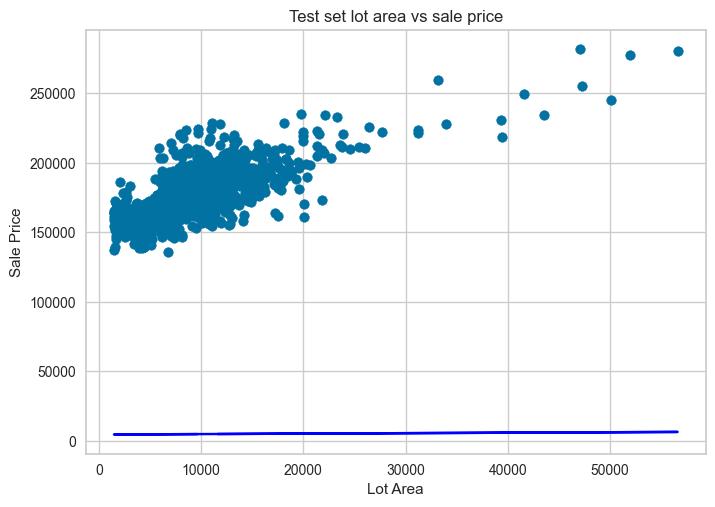

In [48]:
fig = plt.figure()
plt.scatter(area_t, price_t) # Valor teórico (test)
plt.plot(area_t, price_pred, color="blue") # valor predicho
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Test set lot area vs sale price")

In [52]:
# Regression metrics
mse_modelo1=metrics.mean_squared_error(price_t, y_pred_modelo1) 
median_absolute_error_modelo1=metrics.median_absolute_error(price_t, y_pred_modelo1)
r2_modelo1=metrics.r2_score(price_t, y_pred_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))

R^2:  -16.4151
MSE:  4748525847.3721
RMSE:  68909.5483


### Análisis de residuos

In [55]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[169277.0524984] [115773.65967911]  -->  		DIFF: [53503.39281929]
[187758.39398877] [150998.73628546]  -->  		DIFF: [36759.6577033]
[183583.68356955] [172926.81346222]  -->  		DIFF: [10656.87010734]
[179317.47751083] [199635.86073098]  -->  		DIFF: [-20318.38322015]
[150730.0799765] [195167.30202735]  -->  		DIFF: [-44437.22205085]
[177150.98924731] [181938.10905985]  -->  		DIFF: [-4787.11981255]
[172070.65922916] [199449.6407527]  -->  		DIFF: [-27378.98152353]
[175110.95651955] [171771.16395959]  -->  		DIFF: [3339.79255996]
[162011.69883167] [207357.42213669]  -->  		DIFF: [-45345.72330503]
[160726.24783142] [113486.68305575]  -->  		DIFF: [47239.56477567]
[157933.279456] [204328.44956334]  -->  		DIFF: [-46395.17010733]
[145291.24502039] [116802.07930667]  -->  		DIFF: [28489.16571372]
[159672.01763182] [98926.00744212]  -->  		DIFF: [60746.0101897]
[164167.51830188] [149522.41752338]  -->  		DIFF: [14645.1007785]
[150891.63824405] [117097.72142169]  -->  		DIFF: [33793.91682237]


In [51]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 1089
Valor real: [230841.33862628]
Valor predicho: [634201.95921861]
Diferencia máxima: [403360.62059233]


Text(0, 0.5, 'Residuales')

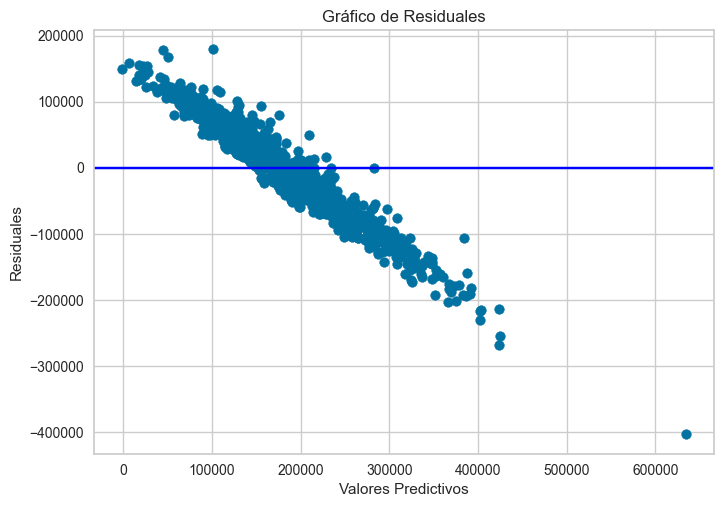

In [53]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')